In [62]:
import pandas as pd
import os
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import ast

In [5]:
# data_folder="./Data/current_FAO/raw_files/"
# for file in os.listdir(data_folder):
#     file=data_folder+file
#     print("\n"+file)
#     try:
#         print(pd.read_csv(file,nrows=2).head())
#     except:
#        pass 


In [215]:
trade_liveanimals_df = pd.read_csv('./Data/current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv', encoding='utf-8', sep=',')


trade_liveanimals_df = (trade_liveanimals_df
                        .set_index(['Area Code', 'Item Code', 'Year Code'])
                        .drop(columns = ['Flag']))
                        
trade_liveanimals_df['Unit'] = trade_liveanimals_df['Unit'].apply(lambda x: x.replace('"', ''))
trade_liveanimals_df.head()

Area    Item  Element Code  \
Area Code Item Code Year Code                                      
2         866       1961       Afghanistan  Cattle          5608   
                    1962       Afghanistan  Cattle          5608   
                    1963       Afghanistan  Cattle          5608   
                    1964       Afghanistan  Cattle          5608   
                    1965       Afghanistan  Cattle          5608   

                                       Element  Year  Unit  Value  
Area Code Item Code Year Code                                      
2         866       1961       Import Quantity  1961  Head    NaN  
                    1962       Import Quantity  1962  Head    NaN  
                    1963       Import Quantity  1963  Head    NaN  
                    1964       Import Quantity  1964  Head    NaN  
                    1965       Import Quantity  1965  Head    NaN

In [216]:
trade_liveanimals_df.Element.unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

## Import Quantities

In [227]:
trade_liveanimals_importquant_df = trade_liveanimals_df.loc[trade_liveanimals_df.Element == 'Import Quantity']
trade_liveanimals_importquant_df.dropna(subset = ['Value'], inplace = True)
trade_liveanimals_importquant_df.rename(columns = {'Value': 'Import Quantity'}, inplace = True)
trade_liveanimals_importquant_df.head()
trade_liveanimals_importquant_df.Unit.unique()
trade_liveanimals_importquant_df.count()

C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Area               110820
Item               110820
Element Code       110820
Element            110820
Year               110820
Unit               110820
Import Quantity    110820
dtype: int64

### Sorting Different Units

In [226]:
trade_1000Head_df = trade_liveanimals_importquant_df.loc[trade_liveanimals_importquant_df.Unit == '1000 Head']
trade_1000Head_df['Import Quantity'] = trade_1000Head_df['Import Quantity']*1000
trade_1000Head_df['Unit'] = 'Head'
trade_1000Head_df.sample()

trade_liveanimals_importquant_df = pd.concat([trade_liveanimals_importquant_df, 
                                              trade_1000Head_df],
                                              sort=False)

trade_liveanimals_importquant_df.count()


C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Area               211436
Item               211436
Element Code       211436
Element            211436
Year               211436
Unit               211436
Import Quantity    211436
dtype: int64

## Import Values


In [221]:
trade_liveanimals_importvalue_df = trade_liveanimals_df.loc[trade_liveanimals_df.Element == 'Import Value']
trade_liveanimals_importvalue_df.dropna(subset = ['Value'], inplace = True)
trade_liveanimals_importvalue_df.rename(columns = {'Value': 'Import Value'}, inplace = True)
trade_liveanimals_importvalue_df.head()
trade_liveanimals_importvalue_df.Unit.unique()

C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array(['1000 US$'], dtype=object)

In [150]:
# f, ax = plt.subplots(figsize=(10, 8))
# sns.lineplot(x=trade_liveanimals_importquant_df['Year Code'], y=trade_liveanimals_importquant_df['Import Quantity'])


## Export Quantity

In [180]:
trade_liveanimals_exportquant_df = trade_liveanimals_df.loc[trade_liveanimals_df.Element == 'Export Quantity']
trade_liveanimals_exportquant_df.dropna(subset = ['Value'], inplace = True)
trade_liveanimals_exportquant_df.rename(columns = {'Value': 'Export Quantity'}, inplace = True)
trade_liveanimals_exportquant_df.head()

C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Area      Item  Element Code  \
Area Code Item Code Year Code                                        
2         1057      1961       Afghanistan  Chickens          5909   
                    1962       Afghanistan  Chickens          5909   
                    1963       Afghanistan  Chickens          5909   
                    1964       Afghanistan  Chickens          5909   
                    1965       Afghanistan  Chickens          5909   

                                       Element  Year       Unit  \
Area Code Item Code Year Code                                     
2         1057      1961       Export Quantity  1961  1000 Head   
                    1962       Export Quantity  1962  1000 Head   
                    1963       Export Quantity  1963  1000 Head   
                    1964       Export Quantity  1964  1000 Head   
                    1965       Export Quantity  1965  1000 Head   

                               Export Quantity  
Area Code Item Code Year Code                   
2         1057      1961                   0.0  
                    1962                   0.0  
                    1963                   0.0  
                    1964                   0.0  
                    1965                   0.0

## Export Value

In [181]:
trade_liveanimals_exportvalue_df = trade_liveanimals_df.loc[trade_liveanimals_df.Element == 'Export Value']
trade_liveanimals_exportvalue_df.dropna(subset = ['Value'], inplace = True)
trade_liveanimals_exportvalue_df.rename(columns = {'Value': 'Export Value'}, inplace = True)
trade_liveanimals_exportvalue_df.head()

C:\Users\nanil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Area      Item  Element Code  \
Area Code Item Code Year Code                                        
2         1057      1961       Afghanistan  Chickens          5922   
                    1962       Afghanistan  Chickens          5922   
                    1963       Afghanistan  Chickens          5922   
                    1964       Afghanistan  Chickens          5922   
                    1965       Afghanistan  Chickens          5922   

                                    Element  Year      Unit  Export Value  
Area Code Item Code Year Code                                              
2         1057      1961       Export Value  1961  1000 US$           0.0  
                    1962       Export Value  1962  1000 US$           0.0  
                    1963       Export Value  1963  1000 US$           0.0  
                    1964       Export Value  1964  1000 US$           0.0  
                    1965       Export Value  1965  1000 US$           0.0

## Joined Dataframe

In [182]:
trade_liveanimals_joined_df = pd.concat([trade_liveanimals_exportvalue_df, 
                                        trade_liveanimals_exportquant_df, 
                                        trade_liveanimals_importvalue_df,
                                        trade_liveanimals_importquant_df], sort=False)
trade_liveanimals_joined_df.head()


Area      Item  Element Code  \
Area Code Item Code Year Code                                        
2         1057      1961       Afghanistan  Chickens          5922   
                    1962       Afghanistan  Chickens          5922   
                    1963       Afghanistan  Chickens          5922   
                    1964       Afghanistan  Chickens          5922   
                    1965       Afghanistan  Chickens          5922   

                                    Element  Year      Unit  Export Value  \
Area Code Item Code Year Code                                               
2         1057      1961       Export Value  1961  1000 US$           0.0   
                    1962       Export Value  1962  1000 US$           0.0   
                    1963       Export Value  1963  1000 US$           0.0   
                    1964       Export Value  1964  1000 US$           0.0   
                    1965       Export Value  1965  1000 US$           0.0   

                               Export Quantity  Import Value  Import Quantity  
Area Code Item Code Year Code                                                  
2         1057      1961                   NaN           NaN              NaN  
                    1962                   NaN           NaN              NaN  
                    1963                   NaN           NaN              NaN  
                    1964                   NaN           NaN              NaN  
                    1965                   NaN           NaN              NaN

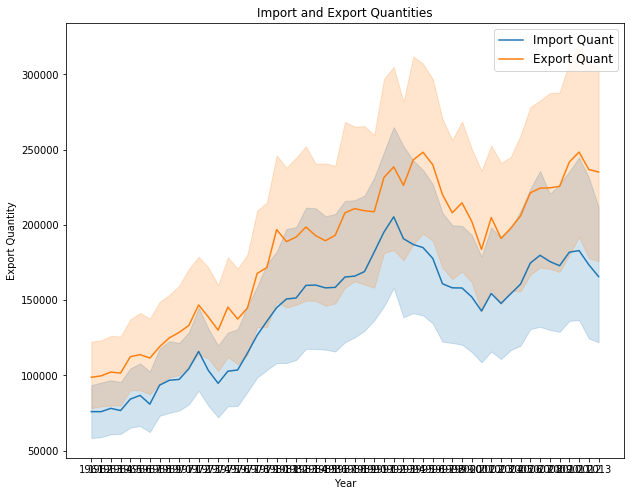

In [187]:

f, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=trade_liveanimals_joined_df['Year'], y=trade_liveanimals_joined_df['Import Quantity'], label='Import Quant')
sns.lineplot(x=trade_liveanimals_joined_df['Year'], y=trade_liveanimals_joined_df['Export Quantity'], label='Export Quant')
ax.set(title='Import and Export Quantities')
ax.legend( loc="upper right", frameon=True, fontsize='large')